<a href="https://colab.research.google.com/github/Abubacker10/Deep-Learning-Lab/blob/main/07_Predicting_Stock_Prices_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


In [ ]:
sbin = yf.Ticker('TCS')

In [ ]:
start_date = dt.datetime(2013,1,1)
end_date = dt.datetime(2018,12,31)
stk_data = sbin.history(period="1y", start=start_date, end=end_date)

In [ ]:
stk_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-11-01 00:00:00-04:00,32.717391,34.586956,30.006520,33.839130,14667600,0.0,0.0
2013-11-04 00:00:00-05:00,34.399999,34.399999,32.427607,33.044563,1586600,0.0,0.0
2013-11-05 00:00:00-05:00,32.820217,33.184782,32.549130,33.044563,337700,0.0,0.0
2013-11-06 00:00:00-05:00,33.287609,34.110219,33.287609,33.558697,549600,0.0,0.0
2013-11-07 00:00:00-05:00,34.400000,34.400000,31.894782,33.007175,883700,0.0,0.0


In [ ]:
stk_data.shape

(1298, 7)

<Axes: title={'center': 'Historical Stock Price'}, xlabel='Date', ylabel='Stock Price'>

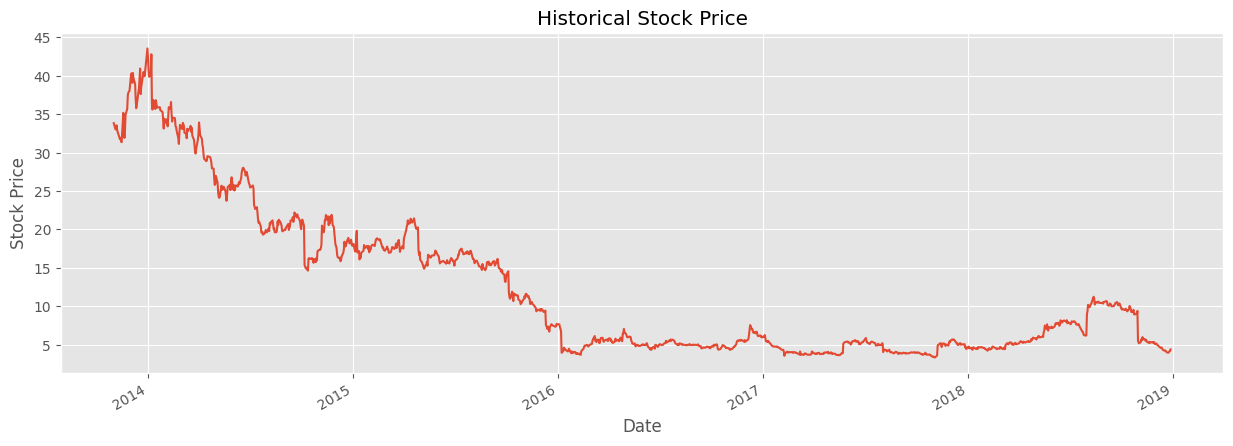

In [ ]:
plt.figure(figsize=(15,5))
stk_data['Close'].plot(kind='line',ylabel='Stock Price',title='Historical Stock Price')

In [ ]:
df = stk_data[['Open','High','Low','Close']]

In [ ]:
train_set = df.iloc[:,[1]]

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(train_set)

In [ ]:
X_train = []
y_train = []
for i in range(60,df.shape[0]):
  X_train.append(train_set_scaled[i-60:i,0])
  y_train.append(train_set_scaled[i,0])
X_train,y_train  = np.array(X_train),np.array(y_train)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [ ]:
X_train.shape,y_train.shape

((1238, 60, 1), (1238,))

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam',loss='mse')

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
regressor.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
39/39 [==============================] - 14s 148ms/step - loss: 0.0087
Epoch 2/20
39/39 [==============================] - 4s 107ms/step - loss: 0.0032
Epoch 3/20
39/39 [==============================] - 4s 107ms/step - loss: 0.0022
Epoch 4/20
39/39 [==============================] - 7s 178ms/step - loss: 0.0021
Epoch 5/20
39/39 [==============================] - 4s 108ms/step - loss: 0.0023
Epoch 6/20
39/39 [==============================] - 5s 123ms/step - loss: 0.0020
Epoch 7/20
39/39 [==============================] - 5s 134ms/step - loss: 0.0021
Epoch 8/20
39/39 [==============================] - 6s 164ms/step - loss: 0.0020
Epoch 9/20
39/39 [==============================] - 6s 152ms/step - loss: 0.0018
Epoch 10/20
39/39 [==============================] - 4s 107ms/step - loss: 0.0016
Epoch 11/20
39/39 [==============================] - 4s 108ms/step - loss: 0.0017
Epoch 12/20
39/39 [==============================] - 6s 153ms/step - loss: 0.0015
Epoch 13/20
39/39 [=====

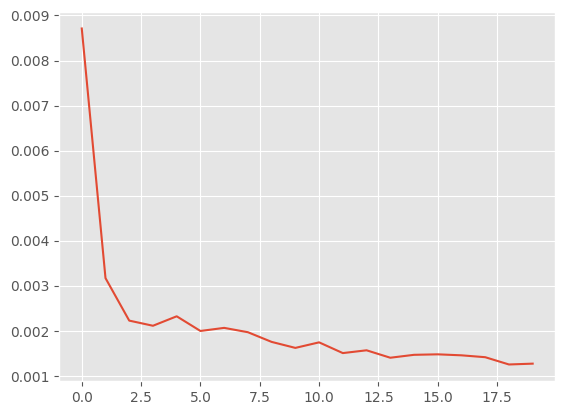

In [ ]:
plt.plot(regressor.history.history['loss'])

In [ ]:
test_data = sbin.history(start=dt.datetime(2019,1,1) , end=dt.datetime(2019,9,18))
test_data.shape

(179, 7)

In [ ]:
dataset_total = pd.concat([stk_data['Open'],test_data['Open']])

In [ ]:
inputs = dataset_total[len(dataset_total)-len(test_data)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
X_test = []
for i in range(60,239):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_test.shape

(179, 60, 1)

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

6/6 [==============================] - 3s 35ms/step


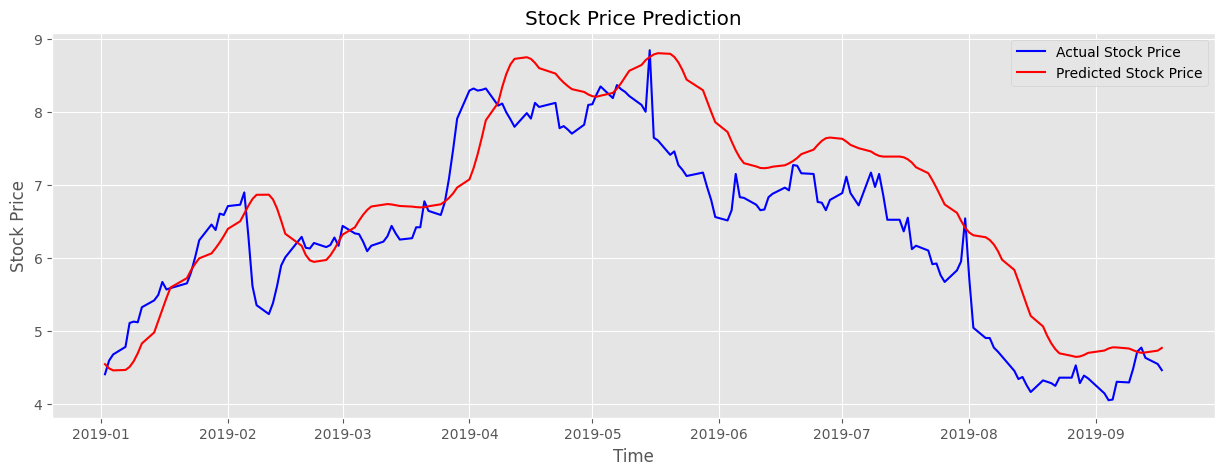

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(test_data.index,test_data['Open'],color='blue',label='Actual Stock Price')
plt.plot(test_data.index,predicted_stock_price,color='red',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
mean_absolute_error(test_data['Open'].values,predicted_stock_price) # total fluctuation in price


0.5728759627236044

In [ ]:
mean_squared_error(test_data['Open'].values,predicted_stock_price)

0.5007213667172641